In [51]:
import pandas as pd
import numpy as np
import nltk

nltk.download()

% matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [5]:
df = pd.read_csv('new_df.csv')
df = df.drop('Unnamed: 0', 1)
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me: i would love to think that i was ...,currently working as an international agent fo...,making people laugh. ranting about a good sal...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means. 1. i am...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn't want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


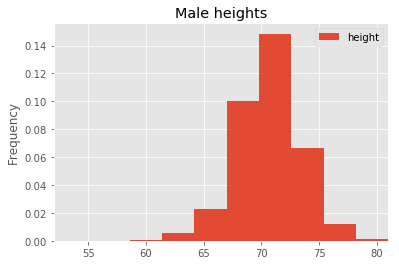

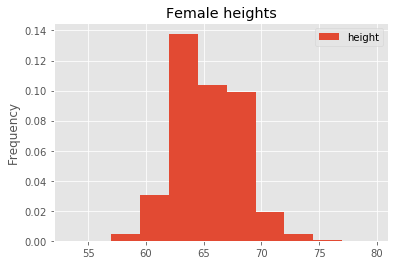

In [41]:
## The first example analyses will be a comparison
## between height for male and female users

## The males shown here in the histograms are a bit
## taller than the female population. This makes sense
## because it follows the national average.

df[['sex', 'height']].loc[df.sex == 'm'].plot.hist(xlim=(52, 81), normed=True, title='Male heights')
df[['sex', 'height']].loc[df.sex == 'f'].plot.hist(xlim=(52, 81), normed=True, title='Female heights')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A555F5D588>], dtype=object)

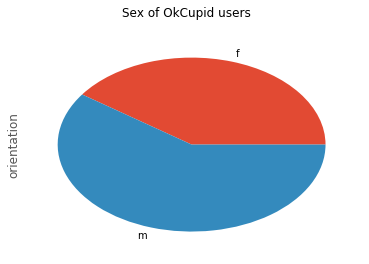

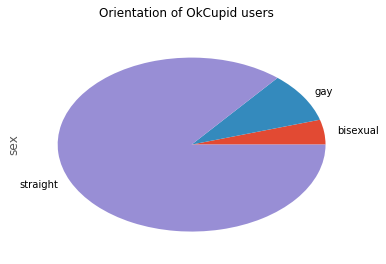

In [7]:
## An interesting question that might be
## raised is: How is the dating pool?
## Are there more men than women?
## What sexual orientation is the norm for
## OkCupid users?

df[['sex','orientation']].groupby('sex').count().plot.pie(legend=False, title='Sex of OkCupid users', subplots=True)
df[['sex','orientation']].groupby('orientation').count().plot.pie(legend=False, title='Orientation of OkCupid users', subplots=True)

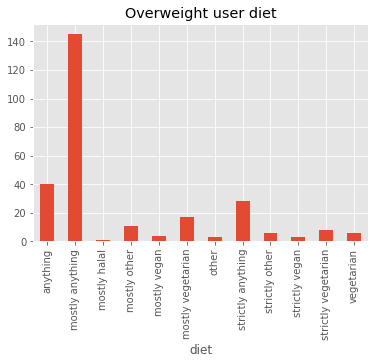

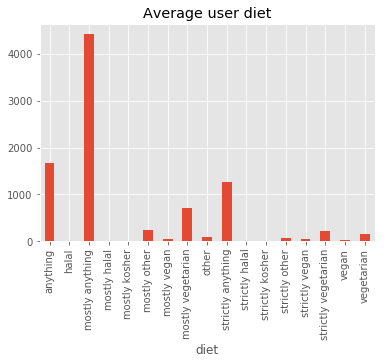

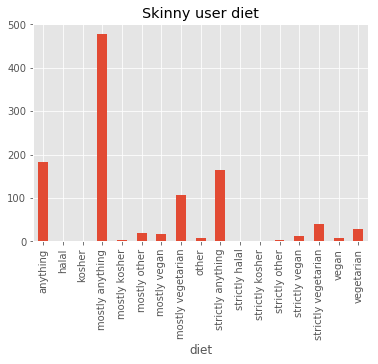

In [43]:
## Something that we could predict is
## What are the relationships between
## body type and diet?

## We will compare: overweight, average,
## and skinny

df[['body_type', 'diet']].loc[df.body_type == 'overweight'].groupby('diet').count().plot.bar(title='Overweight user diet', legend=False)
df[['body_type', 'diet']].loc[df.body_type == 'average'].groupby('diet').count().plot.bar(title='Average user diet', legend=False)
df[['body_type', 'diet']].loc[df.body_type == 'skinny'].groupby('diet').count().plot.bar(title='Skinny user diet', legend=False)


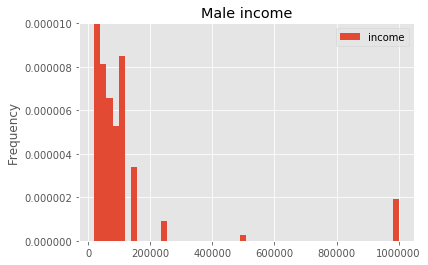

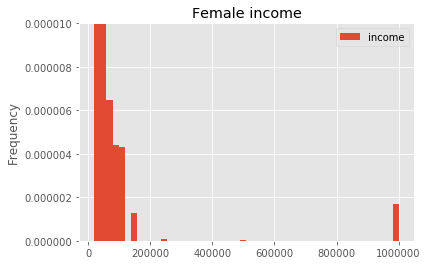

In [48]:
## Comparison between sex and income.

male_income = df[['sex','income']].loc[df.sex == 'm']
female_income = df[['sex','income']].loc[df.sex == 'f']
male_income = male_income[male_income != -1]
female_income = female_income[female_income != -1]

male_income.plot.hist(normed=True, title='Male income', ylim=[0,.00001], bins=50)
female_income.plot.hist(normed=True, title='Female income', ylim=[0,.00001], bins=50)

In [103]:
## Let's examine some essays now
## We are going to start with most
## repeated words by gender

essay = df[['essay0']].iloc[0,0]
all_words = essay.split()
freq = nltk.FreqDist(all_words)
freq.most_common(10)

[('to', 13),
 ('i', 8),
 ('you', 7),
 ('of', 6),
 ('the', 6),
 ('and', 6),
 ('a', 6),
 ('have', 6),
 ('be', 5),
 ('about', 4)]

In [159]:
essays = df['essay0']

all_essays = []

for essay in essays:
    all_essays.append(essay)
    
#for essays in all_essays:
#    all_words = essay.split()
#    freq =+ nltk.FreqDist(all_words)

#freq.most_common(100)

In [165]:
all_essays

["about me:    i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't say i can tell the difference. i love to talk about ideas and concepts. i forge odd metaphors instead of reciting cliches. like the simularities between a friend of mine's house and an underwater salt mine. my favorite word is salt by the way (weird choice i know). to me most things in life are better as metaphors. i seek to make myself a little better everyday, in some productively lazy way. got tired of tying my shoes. considered hiring a five year old, but would probably have to tie both of our shoes... decided to only wear leather shoes dress shoes.    about you:    you love to have really serious, really deep conversations about really silly stuff. you have to be willing to snap me out of a light hearted rant with a kiss. you don't have to be funny, but you have to be able to make me laugh. you should be able to bend spoons with your mind, a